In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

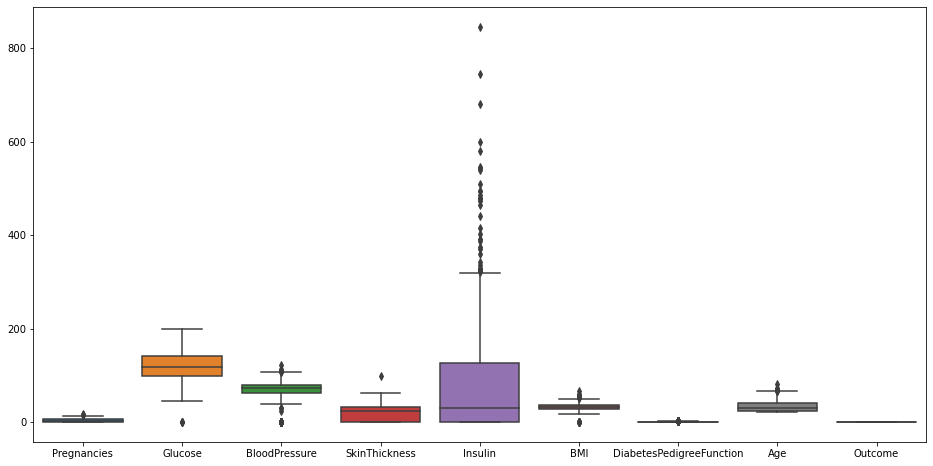

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)

In [18]:
df1=df.copy()

In [19]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
for i in df1.columns:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df1[i]=np.where(df[i]>upper_limit, upper_limit, np.where(df[i]<lower_limit, lower_limit,df1[i]))
    
    

In [24]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


<AxesSubplot:>

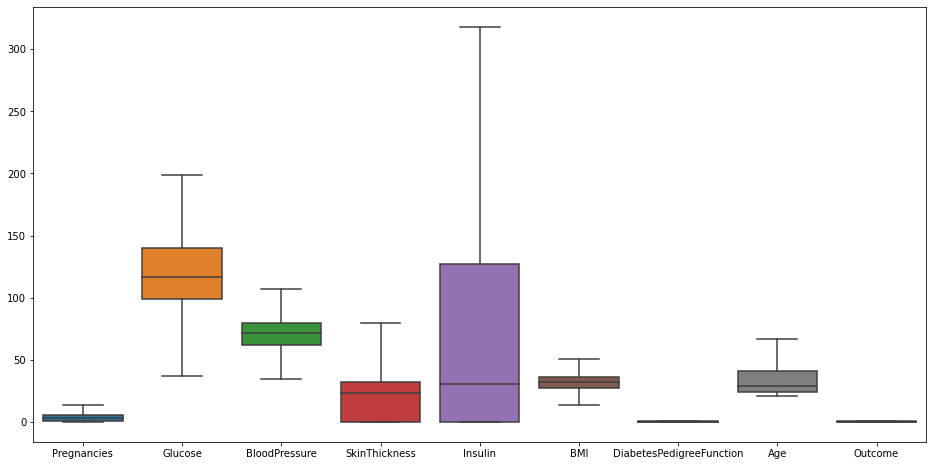

In [26]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df1)

# segregate x and y

In [28]:
x=df1.drop(columns=['Outcome'])
y=df['Outcome']

# scaling

In [29]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

# split x and y into train and test

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=43)

In [32]:
kn=KNeighborsClassifier()

In [33]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred=kn.predict(x_test)

In [35]:
y_pred_train=kn.predict(x_train)

In [36]:
accuracy_score(y_pred,y_test)

0.7337662337662337

In [37]:
accuracy_score(y_pred_train,y_train)

0.8436482084690554

# Hyperparameter tunning for KNN

In [59]:
param_grid={
        'n_neighbors': list(range(1,70,2))
}

In [60]:
grid=GridSearchCV(kn,param_grid,verbose=3)

In [61]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.732 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.699 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.683 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.659 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.713 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.732 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.797 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.756 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.724 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.713 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.740 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5

[CV 3/5] END ....................n_neighbors=51;, score=0.756 total time=   0.0s
[CV 4/5] END ....................n_neighbors=51;, score=0.740 total time=   0.0s
[CV 5/5] END ....................n_neighbors=51;, score=0.721 total time=   0.0s
[CV 1/5] END ....................n_neighbors=53;, score=0.748 total time=   0.0s
[CV 2/5] END ....................n_neighbors=53;, score=0.789 total time=   0.0s
[CV 3/5] END ....................n_neighbors=53;, score=0.740 total time=   0.0s
[CV 4/5] END ....................n_neighbors=53;, score=0.756 total time=   0.0s
[CV 5/5] END ....................n_neighbors=53;, score=0.713 total time=   0.0s
[CV 1/5] END ....................n_neighbors=55;, score=0.748 total time=   0.0s
[CV 2/5] END ....................n_neighbors=55;, score=0.789 total time=   0.0s
[CV 3/5] END ....................n_neighbors=55;, score=0.740 total time=   0.0s
[CV 4/5] END ....................n_neighbors=55;, score=0.756 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             verbose=3)

In [62]:
grid.best_params_

{'n_neighbors': 39}

In [63]:
grid.best_score_

0.7719578835132614

In [68]:
grid=KNeighborsClassifier(n_neighbors= 39)

In [70]:
grid.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [71]:
y_pred_train=grid.predict(x_train)

In [72]:
y_pred=grid.predict(x_test)

In [73]:
accuracy_score(y_pred,y_test)

0.7792207792207793

In [74]:
accuracy_score(y_pred_train,y_train)

0.762214983713355